<a href="https://colab.research.google.com/github/MeyyappanIsATechie/Heart_Disease_Prediction/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Heart Disease prediction Using Machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#here we are using two algorithm

#kNeighborsClassifier
#RandomForestClassifier


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/heart (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             919 non-null    int64  
 1   Sex             919 non-null    object 
 2   ChestPainType   919 non-null    object 
 3   RestingBP       919 non-null    int64  
 4   Cholesterol     919 non-null    int64  
 5   FastingBS       919 non-null    int64  
 6   RestingECG      919 non-null    object 
 7   MaxHR           919 non-null    int64  
 8   ExerciseAngina  919 non-null    object 
 9   Oldpeak         919 non-null    float64
 10  ST_Slope        919 non-null    object 
 11  HeartDisease    919 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.3+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,53.503808,132.412405,198.764962,0.232862,136.856366,0.886942,0.553863
std,9.429924,18.510337,109.329583,0.422885,25.486317,1.066066,0.497361
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


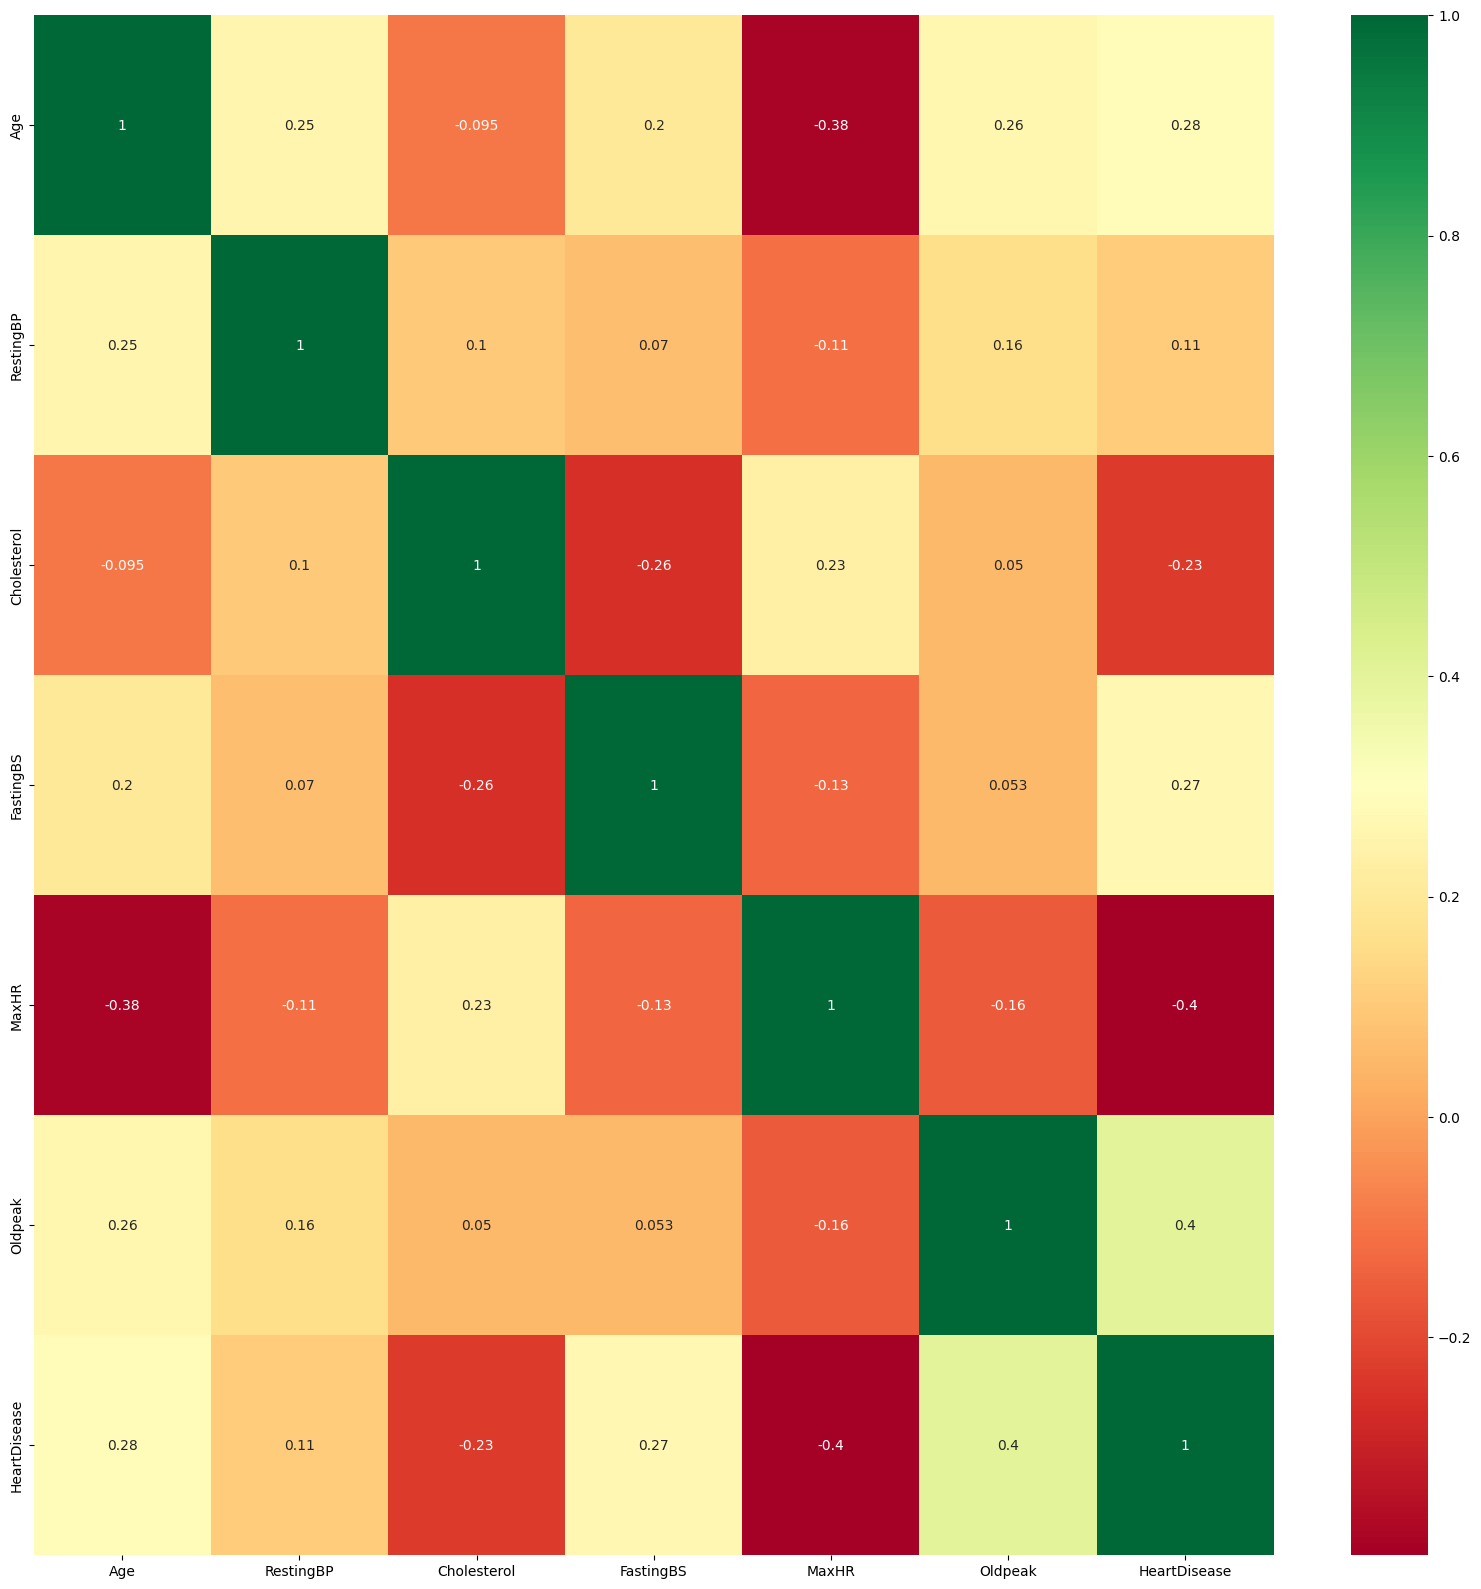

In [ ]:
#Features selection
import seaborn as sns
corrmat=df.corr()
top_corr_features =corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

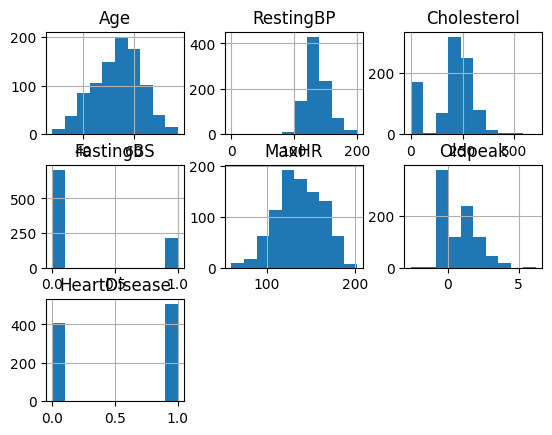

In [ ]:
df.hist()

<Axes: xlabel='HeartDisease', ylabel='count'>

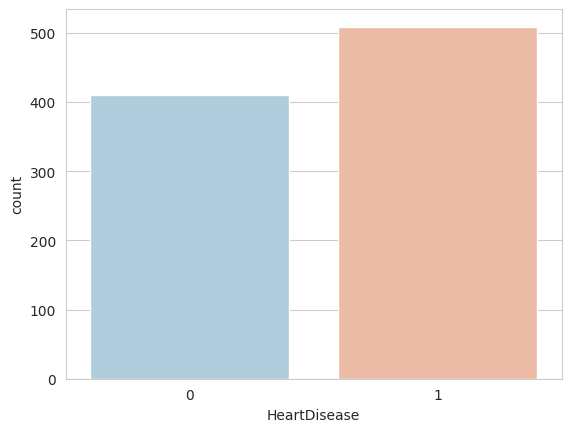

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')


In [ ]:
#data processing
dataset = pd.get_dummies(df,columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Cholesterol'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
columns_to_scale =['Age', 'MaxHR', 'Oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.head()

,Age,RestingBP,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,Cholesterol_412,Cholesterol_417,Cholesterol_458,Cholesterol_466,Cholesterol_468,Cholesterol_491,Cholesterol_518,Cholesterol_529,Cholesterol_564,Cholesterol_603
0,-1.432796,140,1.379673,-0.832430,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.477868,160,0.751543,0.106109,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-1.751106,130,-1.525427,-0.832430,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.583971,138,-1.132846,0.575379,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.052647,150,-0.583233,-0.832430,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.tail()

,Age,RestingBP,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,Cholesterol_412,Cholesterol_417,Cholesterol_458,Cholesterol_466,Cholesterol_468,Cholesterol_491,Cholesterol_518,Cholesterol_529,Cholesterol_564,Cholesterol_603
914,1.538091,144,0.162671,2.358603,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
915,0.370957,130,-0.858040,0.293817,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
916,0.370957,130,1.458189,-0.832430,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
917,-1.645003,138,1.418931,-0.832430,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
918,-0.690075,147,1.693737,-0.363161,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=dataset['HeartDisease']
x=dataset.drop(['HeartDisease'],axis=1)

In [ ]:
print(x)

          Age  RestingBP     MaxHR   Oldpeak  Sex_F  Sex_M  ChestPainType_ASY  \
0   -1.432796        140  1.379673 -0.832430      0      1                  0   
1   -0.477868        160  0.751543  0.106109      1      0                  0   
2   -1.751106        130 -1.525427 -0.832430      0      1                  0   
3   -0.583971        138 -1.132846  0.575379      1      0                  1   
4    0.052647        150 -0.583233 -0.832430      0      1                  0   
..        ...        ...       ...       ...    ...    ...                ...   
914  1.538091        144  0.162671  2.358603      0      1                  1   
915  0.370957        130 -0.858040  0.293817      0      1                  1   
916  0.370957        130  1.458189 -0.832430      1      0                  0   
917 -1.645003        138  1.418931 -0.832430      0      1                  0   
918 -0.690075        147  1.693737 -0.363161      1      0                  1   

     ChestPainType_ATA  Che

In [ ]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
914    1
915    1
916    1
917    0
918    1
Name: HeartDisease, Length: 919, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
y_test

821    0
263    1
836    1
396    1
486    0
      ..
276    1
197    0
734    1
77     0
418    1
Name: HeartDisease, Length: 184, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores =[]
for k in range(1,21):
  knn_calssifier = KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn_calssifier,x,y,cv=10)
  knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different k values')

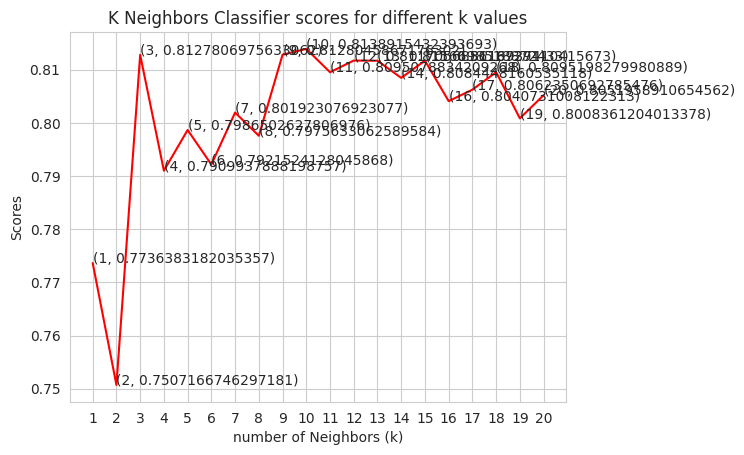

In [ ]:
plt.plot([k for k in range(1,21)],knn_scores, color = 'red')
for i in range(1,21):
  plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('number of Neighbors (k)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different k values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,x,y,cv=10)
knn_scores.append(score.mean())

In [ ]:
score.mean()

0.8117056856187291

# **Randon ForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [ ]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [ ]:
score.mean()

0.8388676540850455

In [ ]:
#logisticReggression
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predl = log.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_predl)

0.8858695652173914